# Model Training & Evaluation

* keep in mind that the preprocessed dataset should be used for the training
* output is not yet generated from last section so original csv file is used until then
* in the dataexploration the most important variables have been determined that best describe PTS in theory


In [56]:
#importing all the relevant modules libaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm



## Step 6: Importing the ***cleaned, encoded & normalized*** data from the preprocessing notebook

In [57]:
df = pd.read_csv('/Users/robertkurtz/Desktop/NBA 2023 Dataplayground/data/df_preprocessed.csv', delimiter=',', encoding='ISO-8859-1' )
df 

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,33,9,23.0,4.0,8.2,...,0.697,2.1,4.3,6.4,1.1,0.7,0.7,1.2,2.2,10.4
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,52,52,35.3,8.6,15.7,...,0.806,2.7,7.3,10.1,3.3,1.2,0.8,2.6,2.8,21.6
3,4,Ochai Agbaji,SG,22,UTA,35,1,14.0,1.5,3.2,...,0.625,0.6,1.0,1.6,0.5,0.1,0.1,0.3,1.4,4.1
4,5,Santi Aldama,PF,22,MEM,52,18,22.0,3.4,7.0,...,0.730,1.0,3.7,4.7,1.2,0.7,0.7,0.7,1.9,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,501,Delon Wright,PG,30,WAS,26,2,22.1,2.1,5.1,...,0.903,0.9,2.2,3.1,3.7,1.9,0.3,0.8,1.4,6.0
501,502,McKinley Wright IV,PG,24,DAL,19,1,10.2,1.0,2.4,...,0.600,0.3,1.1,1.4,1.7,0.4,0.2,0.6,0.9,2.4
502,503,Thaddeus Young,PF,34,TOR,45,9,16.1,2.2,4.0,...,0.692,1.4,1.9,3.4,1.5,1.1,0.1,0.8,1.8,5.0
503,504,Trae Young,PG,24,ATL,50,50,35.5,8.5,19.8,...,0.887,0.7,2.3,3.0,10.2,1.0,0.2,4.2,1.5,26.9


In [58]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

## Step 7: Reducing the Dataset to the necessary

* from the data exploration part we know which variables we want to use for the regression

In [59]:
# From the EDA the following variables/ features have been selected for regression:

predictor_columns = ['FGA', '2PA', 'FTA', 'MP', 'TOV', 'AST', '3PA', 'GS', 'DRB']

# target variable
target = 'PTS'

# create a new dataframe with the selected columns
relevant_columns = predictor_columns + [target]
df_selected = df[relevant_columns]
df_selected

,FGA,2PA,FTA,MP,TOV,AST,3PA,GS,DRB,PTS
0,8.2,6.0,2.7,23.0,1.2,1.1,2.2,9,4.3,10.4
1,6.3,6.2,3.1,27.0,1.9,2.3,0.0,42,6.5,8.6
2,15.7,15.5,5.5,35.3,2.6,3.3,0.2,52,7.3,21.6
3,3.2,1.3,0.5,14.0,0.3,0.5,1.9,1,1.0,4.1
4,7.0,3.3,1.9,22.0,0.7,1.2,3.7,18,3.7,9.5
...,...,...,...,...,...,...,...,...,...,...
500,5.1,2.8,1.2,22.1,0.8,3.7,2.3,2,2.2,6.0
501,2.4,1.7,0.5,10.2,0.6,1.7,0.6,1,1.1,2.4
502,4.0,3.3,0.6,16.1,0.8,1.5,0.6,9,1.9,5.0
503,19.8,13.2,8.6,35.5,4.2,10.2,6.7,50,2.3,26.9


## Step 8: Splitting the data into training and testing sets:

In [60]:
X =  df_selected[predictor_columns] # Independent variables ('FGA', '2PA', 'FTA', 'MP', 'TOV', 'AST', '3PA', 'GS', 'DRB')
y =  df_selected[target] # Dependent variable (PTS)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 9: Fit the decison tree model:

In [61]:
# Create the decision tree regressor
dtree = DecisionTreeRegressor()

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

### Printing the coefficients and intercept of the model:

In [62]:
#print("Intercept:", dtree.intercept_)
#print("Coefficients:", dtree.coef_)

In [63]:
#########################################################################################################################

## Step 10: Perform statistical analysis using statsmodels:

Now we perform statistical analysis using the statsmodels library to gain additional insights into the linear regression model. Specifically, we use the Ordinary Least Squares (OLS) method to fit the model and obtain statistical information about the coefficients, p-values, confidence intervals, and goodness-of-fit measures.

Here's a detailed explanation of what happens in this below step:

**1. Adding a constant column:**

We add a constant column to the X_train dataset using X_train = sm.add_constant(X_train). This constant column represents the intercept term in the linear regression model. It ensures that the model accounts for a constant value even if all the independent variables are zero.

**2. Fitting the OLS model:**

We create an OLS model using sm.OLS(y_train, X_train).
The y_train variable represents the dependent variable ('PTS') while X_train contains the independent variables.
We fit the model to the data using .fit(), which estimates the coefficients and other statistical measures.

**3. Printing the model summary:**

We print the summary of the fitted model using print(model_sm.summary()).
The model summary provides a comprehensive overview of the regression analysis, including statistical measures and information about the coefficients.
The summary includes:
The coefficient estimates for each independent variable, including the intercept.
The standard errors of the coefficients.
The t-values and corresponding p-values, which indicate the statistical significance of each coefficient.
The confidence intervals for the coefficients.
Measures such as R-squared, adjusted R-squared, and F-statistic, which assess the overall goodness-of-fit of the model.


By examining the model summary, you can gain insights into the statistical significance of the coefficients, the strength of the relationship between the independent variables and the dependent variable, and the overall performance of the model.

You can use this information to identify significant predictors, assess the impact of each variable on the dependent variable, and evaluate the overall quality of the regression model.

In [64]:
X_train = sm.add_constant(X_train)  # Add a constant column to X_train
model_sm = sm.OLS(y_train, X_train).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     3122.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          5.43e-323
Time:                        19:12:30   Log-Likelihood:                -412.78
No. Observations:                 353   AIC:                             845.6
Df Residuals:                     343   BIC:                             884.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2718      0.122     -2.236      0.0

### Step 10: B - Deciding which variables to keep and which to drop.

* here FGA & AST have been dropped...

The result is clear there has been the problem of "multicollinarity" between the independent variables. It makes sense as FGA is an average between 2PA & 3PA! 

Also the other variables that are not statistically relevant as they show a high p value are substracted (MP, GS)

In [65]:
# Deciding which predictor variables to keep and which to drop

# - Check the p-values of the coefficients
# - I want to drop all variables with a p-value > 0.05 and see if it makes the predicton better or worse

# New predictors

predictor_columns = ['3PA','2PA', 'FTA', 'TOV','DRB']

# target variable
target = 'PTS'

# create a new dataframe with the selected columns
relevant_columns = predictor_columns + [target]
df_selected = df[relevant_columns]
df_selected



,3PA,2PA,FTA,TOV,DRB,PTS
0,2.2,6.0,2.7,1.2,4.3,10.4
1,0.0,6.2,3.1,1.9,6.5,8.6
2,0.2,15.5,5.5,2.6,7.3,21.6
3,1.9,1.3,0.5,0.3,1.0,4.1
4,3.7,3.3,1.9,0.7,3.7,9.5
...,...,...,...,...,...,...
500,2.3,2.8,1.2,0.8,2.2,6.0
501,0.6,1.7,0.5,0.6,1.1,2.4
502,0.6,3.3,0.6,0.8,1.9,5.0
503,6.7,13.2,8.6,4.2,2.3,26.9


### Doing the splitting again and retraining the model

In [66]:
X =  df_selected[predictor_columns] # Independent variables ('FGA', '2PA', 'FTA', 'MP', 'TOV', 'AST', '3PA', 'GS', 'DRB')
y =  df_selected[target] # Dependent variable (PTS)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# Create the decision tree regressor
dtree = DecisionTreeRegressor(min_samples_split=10)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

In [68]:
X_train = sm.add_constant(X_train)  # Add a constant column to X_train
new_model_sm = sm.OLS(y_train, X_train).fit()
print(new_model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     5562.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:12:31   Log-Likelihood:                -416.56
No. Observations:                 353   AIC:                             845.1
Df Residuals:                     347   BIC:                             868.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2079      0.082     -2.544      0.0

Now all of a sudden the 2PA & 3PA become perfectly statistically relevant, which makes more sense

## Step 11: Evaluate the model on the test set:

In [69]:
X_test.head() # test data

,3PA,2PA,FTA,TOV,DRB
173,1.6,1.5,1.0,0.4,2.4
274,4.4,6.3,2.7,1.6,3.3
490,2.6,3.7,0.7,0.5,3.1
72,1.8,12.4,8.0,1.7,3.8
305,3.6,5.2,1.8,1.4,4.0


In [70]:
X_train.head() # train data

,const,3PA,2PA,FTA,TOV,DRB
5,1.0,2.4,2.3,1.1,1.2,1.4
116,1.0,6.4,6.7,4.0,1.7,2.8
45,1.0,6.0,8.9,5.2,2.3,3.0
16,1.0,0.5,13.2,3.1,2.0,7.3
467,1.0,3.1,3.2,2.3,0.4,1.4


In [71]:
#X_test = sm.add_constant(X_test)  # Add a constant column to X_test
y_pred = dtree.predict(X_test)

# Evaluate model performance
# You can use metrics such as mean squared error (MSE), R-squared, etc.

In [72]:
y_pred

array([ 4.72857143, 14.6       ,  7.55      , 26.325     ,  9.74444444,
        3.8       ,  4.46      ,  3.28571429,  7.9       , 16.65714286,
       21.44444444,  8.3625    ,  9.57142857, 12.88333333, 13.02222222,
        4.14      ,  0.        ,  7.5       ,  4.72857143,  6.0875    ,
        6.0875    ,  6.37142857,  3.62      ,  5.97777778,  0.        ,
       19.38333333,  1.37777778, 21.44444444,  1.47777778, 31.98333333,
        7.55      ,  4.72857143,  6.0875    , 21.44444444,  0.425     ,
       21.44444444, 16.6875    ,  8.3625    ,  4.72857143,  0.        ,
        6.1       , 20.45555556,  3.8       ,  8.3625    , 16.65714286,
        4.32      ,  5.4       , 14.6       , 14.68      , 11.1       ,
        1.47777778, 13.02222222, 26.325     , 19.38333333, 21.44444444,
        6.0875    ,  1.37777778,  1.62      ,  1.62      ,  4.93333333,
        0.825     ,  3.24285714,  2.4       , 12.88333333, 11.1       ,
        4.72857143,  8.3625    ,  5.97777778, 13.02222222, 16.68

In [73]:
from sklearn.metrics import mean_squared_error

# Assuming y_test is the true target variable for the test set

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.158321823677082


## Step 12: Inserting the Prediction in the original Dataset

* the strategy is to use the index

In [74]:
X_test.index

Int64Index([173, 274, 490,  72, 305,  76, 476, 140, 470, 499,
            ...
             66, 211, 403,  94, 154, 440,  23, 225, 432, 446],
           dtype='int64', length=152)

In [75]:
# Now I want to create a dataframe with the predicted values and the actual values
# I will use the index of the X_test dataframe as the index for the new dataframe
# I will also add the actual values from the y_test dataframe

df_pred = pd.DataFrame(y_pred, index=X_test.index, columns=['PTS_Pred'])
df_pred['PTS_Actual'] = y_test

player_column = df.loc[X_test.index, 'Player']  # Select the "Player" column for the corresponding index

df_pred = pd.concat([player_column, X_test, df_pred], axis=1)
df_pred

,Player,3PA,2PA,FTA,TOV,DRB,PTS_Pred,PTS_Actual
173,Blake Griffin,1.6,1.5,1.0,0.4,2.4,4.728571,4.3
274,Caris LeVert,4.4,6.3,2.7,1.6,3.3,14.600000,12.3
490,Kenrich Williams,2.6,3.7,0.7,0.5,3.1,7.550000,7.8
72,Jimmy Butler,1.8,12.4,8.0,1.7,3.8,26.325000,21.9
305,Jalen McDaniels,3.6,5.2,1.8,1.4,4.0,9.744444,10.5
...,...,...,...,...,...,...,...,...
440,Garrett Temple,1.2,0.8,0.2,0.2,0.5,1.377778,2.3
23,Desmond Bane,7.1,9.0,3.8,2.2,4.3,20.455556,21.5
225,Reggie Jackson,4.2,5.6,1.3,1.8,1.8,11.100000,10.9
432,Isaiah Stewart,4.1,4.9,3.0,1.4,5.8,11.033333,11.3


## Step 13: Adding the difference column and make vizualizations

In [76]:
#Adding the difference between the actual and predicted values

df_pred['Dif'] = df_pred['PTS_Actual'] - df_pred['PTS_Pred']
df_pred

,Player,3PA,2PA,FTA,TOV,DRB,PTS_Pred,PTS_Actual,Dif
173,Blake Griffin,1.6,1.5,1.0,0.4,2.4,4.728571,4.3,-0.428571
274,Caris LeVert,4.4,6.3,2.7,1.6,3.3,14.600000,12.3,-2.300000
490,Kenrich Williams,2.6,3.7,0.7,0.5,3.1,7.550000,7.8,0.250000
72,Jimmy Butler,1.8,12.4,8.0,1.7,3.8,26.325000,21.9,-4.425000
305,Jalen McDaniels,3.6,5.2,1.8,1.4,4.0,9.744444,10.5,0.755556
...,...,...,...,...,...,...,...,...,...
440,Garrett Temple,1.2,0.8,0.2,0.2,0.5,1.377778,2.3,0.922222
23,Desmond Bane,7.1,9.0,3.8,2.2,4.3,20.455556,21.5,1.044444
225,Reggie Jackson,4.2,5.6,1.3,1.8,1.8,11.100000,10.9,-0.200000
432,Isaiah Stewart,4.1,4.9,3.0,1.4,5.8,11.033333,11.3,0.266667


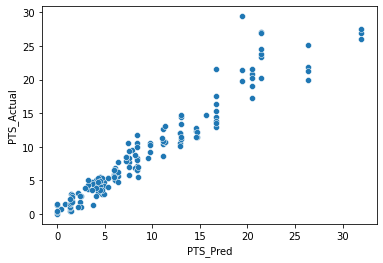

In [77]:
#making different visualizations

sns.scatterplot(x='PTS_Pred', y='PTS_Actual', data=df_pred)
plt.show() #almost too perfect...

<AxesSubplot:xlabel='PTS_Pred', ylabel='Dif'>

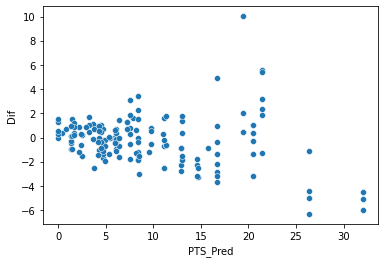

In [78]:
#vizualizing the difference between the actual and predicted values

sns.scatterplot(x='PTS_Pred', y='Dif', data=df_pred)

# the higher the PTS value the bigger the variance it seems

In [79]:
#I want to see the top 10 players with the biggest difference between the actual and predicted values

#--> It's actually not the biggest difference but the biggest difference in the positive direction

df_pred.sort_values(by='Dif', ascending=False).head(10)

,Player,3PA,2PA,FTA,TOV,DRB,PTS_Pred,PTS_Actual,Dif
101,Stephen Curry,11.4,8.4,5.4,3.2,5.8,19.383333,29.4,10.016667
218,Kyrie Irving,8.7,11.6,4.5,2.3,4.1,21.444444,27.0,5.555556
318,Donovan Mitchell,9.3,10.3,5.3,2.8,3.1,21.444444,26.9,5.455556
2,Bam Adebayo,0.2,15.5,5.5,2.6,7.3,16.687500,21.6,4.912500
68,Thomas Bryant,1.2,6.0,2.6,0.7,5.0,8.362500,11.8,3.437500
132,Anthony Edwards,7.3,11.9,5.4,3.3,5.3,21.444444,24.6,3.155556
384,Austin Reaves,3.4,3.6,2.9,1.4,2.4,7.500000,10.6,3.100000
268,Zach LaVine,7.5,10.3,5.3,2.7,4.2,21.444444,23.8,2.355556
46,Bol Bol,1.6,6.0,1.7,1.8,5.1,8.362500,10.6,2.237500
444,Klay Thompson,10.6,7.8,2.0,1.7,3.3,19.383333,21.4,2.016667


In [80]:
#I want to see the top 10 players with the smallest difference between the actual and predicted values

#--> It's actually not the biggest difference but the biggest difference in the negative direction

df_pred.sort_values(by='Dif', ascending=True).head(10)

,Player,3PA,2PA,FTA,TOV,DRB,PTS_Pred,PTS_Actual,Dif
22,Paolo Banchero,4.2,11.3,7.6,2.7,5.6,26.325000,20.0,-6.325000
496,Zion Williamson,0.7,15.5,8.6,3.4,5.0,31.983333,26.0,-5.983333
503,Trae Young,6.7,13.2,8.6,4.2,2.3,31.983333,26.9,-5.083333
180,James Harden,7.2,7.3,6.4,3.4,5.8,26.325000,21.3,-5.025000
325,Ja Morant,5.2,15.5,8.4,3.6,4.7,31.983333,27.5,-4.483333
72,Jimmy Butler,1.8,12.4,8.0,1.7,3.8,26.325000,21.9,-4.425000
90,Nic Claxton,0.0,7.8,3.3,1.3,6.5,16.657143,13.0,-3.657143
469,John Wall,3.2,6.7,3.3,2.4,2.3,14.680000,11.4,-3.280000
75,Kentavious Caldwell-Pope,4.3,4.4,1.6,1.1,2.4,14.600000,11.4,-3.200000
194,Gordon Hayward,3.3,7.9,3.0,1.8,3.4,16.657143,13.5,-3.157143


In [81]:
# I want to know the MSE for df_pred

mse = mean_squared_error(df_pred['PTS_Actual'], df_pred['PTS_Pred'])

print("Mean Squared Error:", mse)

Mean Squared Error: 4.158321823677082


## Explanation for the poor outcome

It is not uncommon for linear regression models to perform better than decision tree models for certain types of regression tasks, especially when the relationships between the features and the target variable are relatively linear. Linear regression models are specifically designed to model linear relationships between the features and the target variable.

Decision tree models, on the other hand, are more suitable for capturing complex non-linear relationships and interactions between features. They can handle both categorical and continuous features and are capable of fitting more complex patterns in the data. However, decision trees can also be prone to overfitting, especially when the tree grows too deep and captures noise in the data.

The performance of different models can vary depending on the specific dataset and the nature of the relationships between the features and the target variable. In some cases, linear regression may outperform decision trees, while in other cases, decision trees or other non-linear models may provide better results.

It's important to evaluate and compare the performance of different models using appropriate evaluation metrics and techniques, such as mean squared error (MSE), mean absolute error (MAE), or cross-validation. This can help you determine the most suitable model for your specific regression task.

Additionally, consider exploring other regression models, such as random forests, support vector regression, or gradient boosting, which can provide more flexibility and potentially better performance for complex regression problems.

### Plotting the decision tree

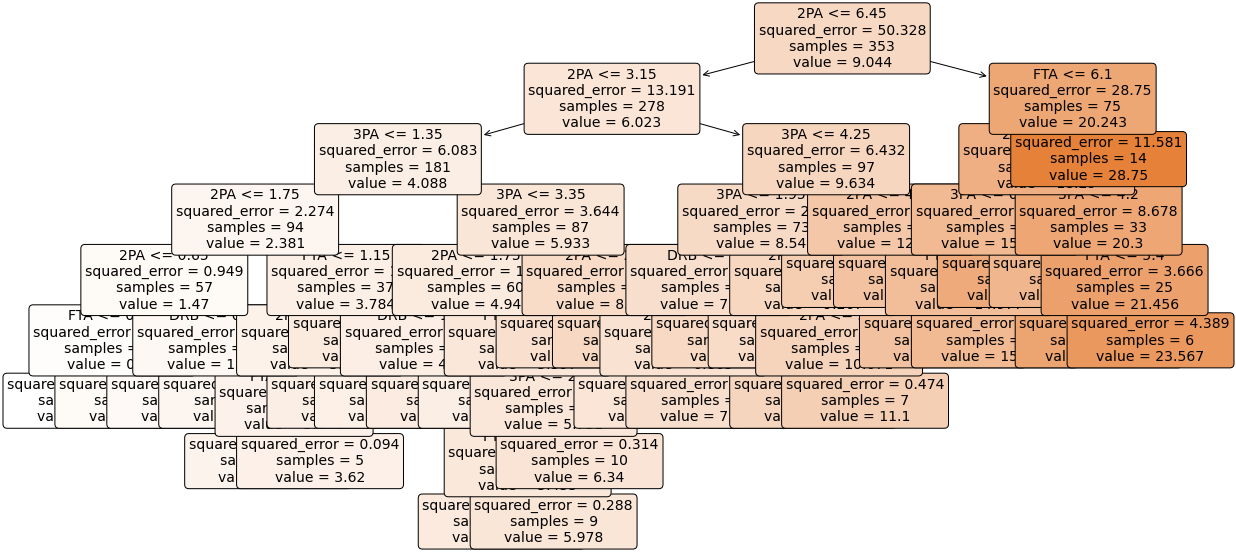

In [54]:
# plotting the decision tree

plt.figure(figsize=(20,10))
tree.plot_tree(dtree, filled=True, feature_names=predictor_columns, rounded=True, fontsize=14)
plt.show()


## Step 14: Saving the trained model

Save the Trained Model: After training and evaluating the model, it's important to save it for future use. This can be done using the serialization capabilities of the chosen machine learning library, such as pickle in Python.

In [44]:
import pickle

# Save the trained model
model_filename = "NBA_PTS_PREDICTOR_DECISION_TREE.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(dtree, file)